1) Global maps of monthly averages  (12 plots)
2) Global map of annual average maximum value
3) Global map of annual average number of hours > 30C, >32C, and >35C)  (3 plots)
4) Global map of 42-year linear trend by month (12 plots, one for each month)

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
 
import cartopy.feature as cfeature
import cartopy.crs as ccrs


In [2]:
def ax_coastlines_country(ax_s):
    ax_s.coastlines(linewidths=0.5)
    ax_s.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))

In [3]:
proj = ccrs.PlateCarree()

#### 1 monthly average wetbulb temperature

In [40]:
dir_i = '/glade/campaign/mmm/c3we/mingge/wetbulb/'
dir_o = dir_i + 'PLOT/'

year_s = 1979
year_e = 2020
#year_e = year_s + 1

n_year = year_e - year_s + 1
n_month = 12

n_lat = 721 
n_lon = 1440

# Create an empty Numpy array  

twb_3d = np.zeros((n_month, n_lat, n_lon))
#twb_3d = np.empty((0, n_lat, n_lon), float)

# calculate monthly average
for month in range(1, n_month+1, 1):
    for year in range(year_s, year_e + 1):
        flnm = dir_i + 'TWB_' + str(year) + str(month).zfill(2) + '_mean.nc'
        #print(flnm)
        with  xr.open_dataset(flnm) as ds:
            twb = ds['TWB'] 
         
        twb_3d[month-1] = twb_3d[month-1] + twb

twb_3d=twb_3d/n_year

#### Global maps of monthly averages  

In [41]:
#### convert numpy array to dataarray
data_xr = xr.DataArray(twb_3d, coords={'month': range(1,13,1),'latitude': twb.latitude, 'longitude':twb.longitude}, dims=["month","latitude", "longitude"])


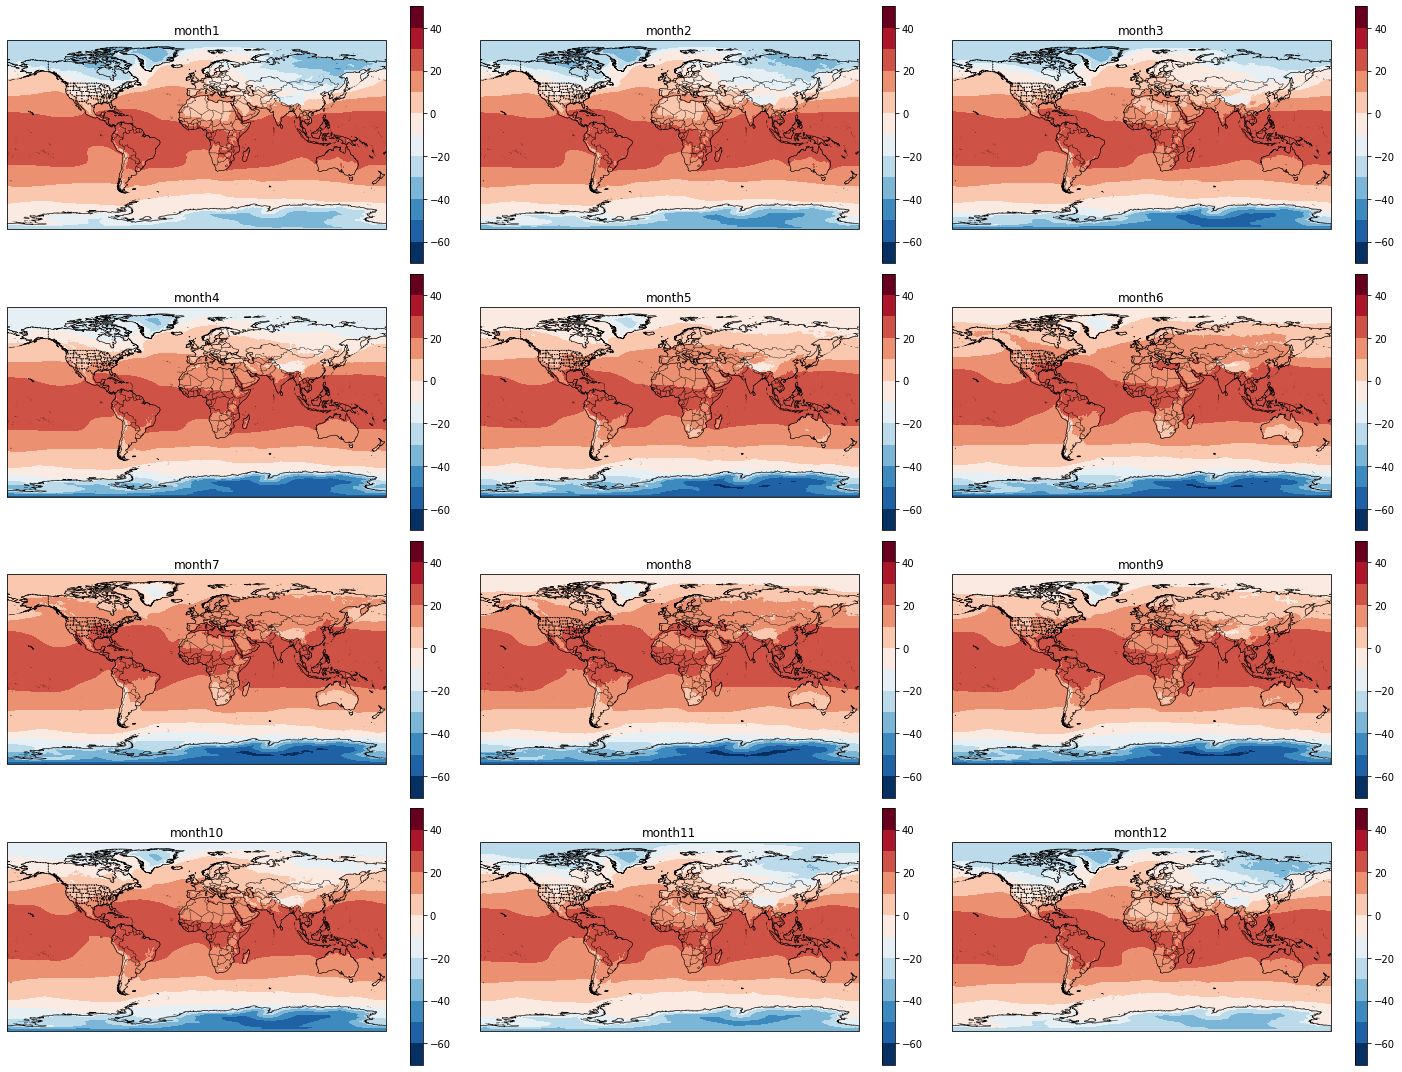

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,15))

cnlevel = np.linspace(-70, 50, num=13)
for row in range(4):
    for col in range(3):
        nn = col + row*3
        ax_coastlines_country(axs[row,col])
        axs[row,col].add_feature(cfeature.STATES, linestyle=':')
        im=data_xr[nn].plot.contourf(
                # reset colorbar label using char_kwargs
                cbar_kwargs={'label': ""},
                levels=cnlevel,
                ax=axs[row,col],
                transform=proj,
                add_colorbar=True)
        axs[row][col].set_title('month' + str(nn+1))
plt.tight_layout()


##### mask ocean

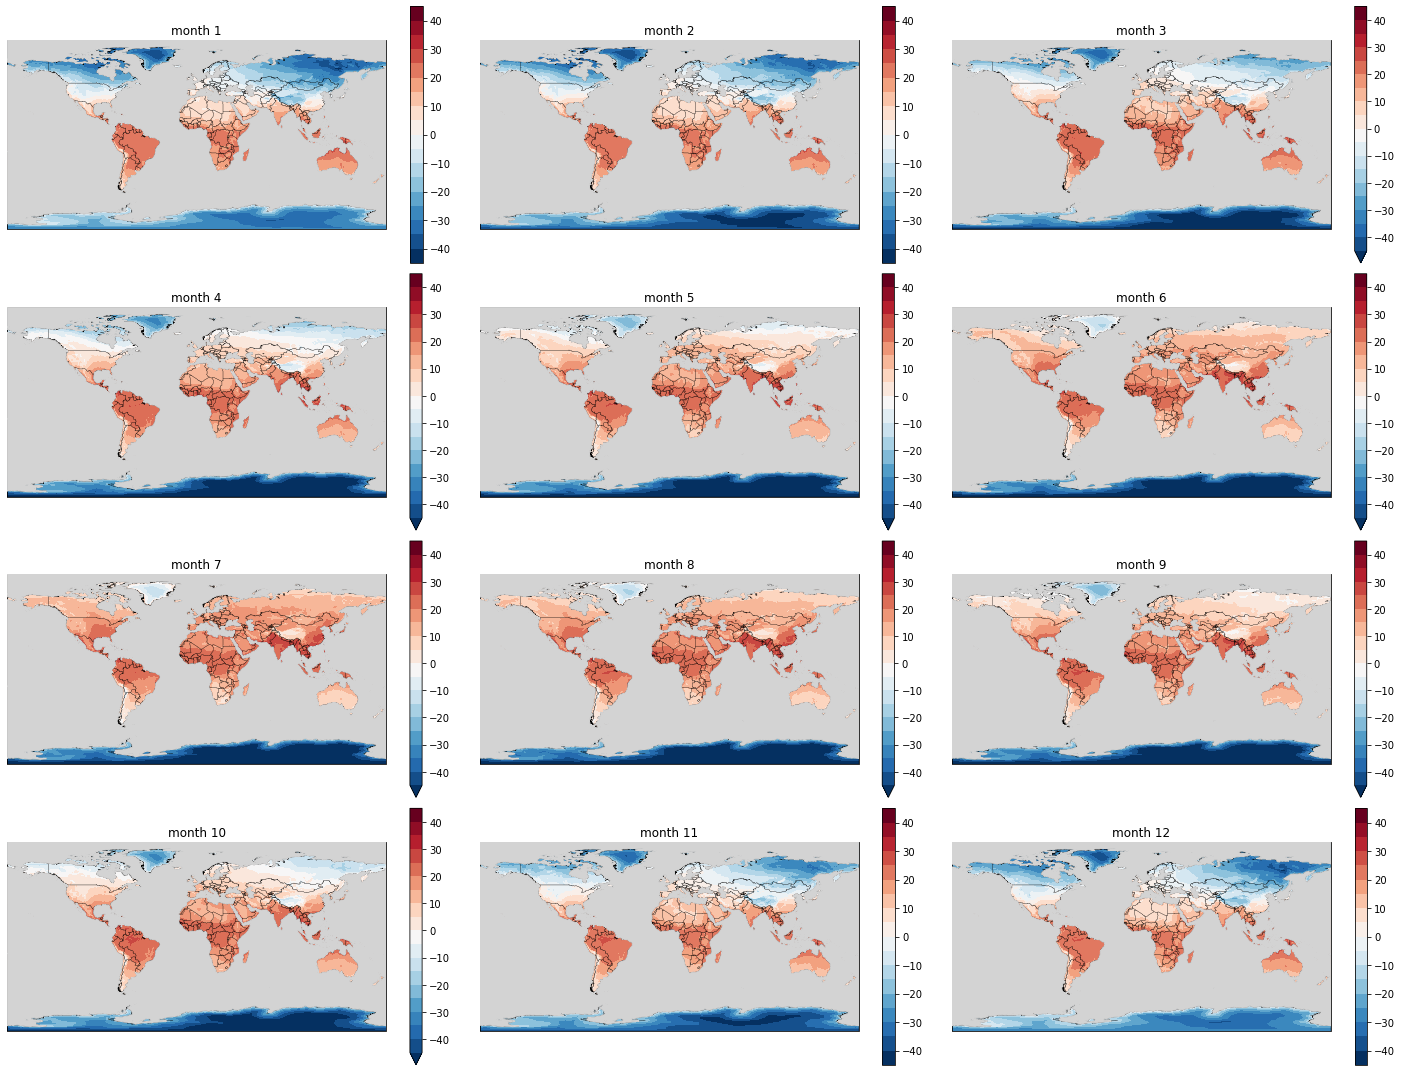

In [55]:
fig, axs = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,15))

cnlevel = np.linspace(-45, 45, num=19)
for row in range(4):
    for col in range(3):
        nn = col + row*3
        ax_coastlines_country(axs[row,col])
        #axs[row,col].add_feature(cfeature.STATES, linestyle=':')
        im=data_xr[nn].plot.contourf(
                # reset colorbar label using char_kwargs
                cbar_kwargs={'label': ""},
                levels=cnlevel,
                ax=axs[row,col],
                transform=proj,
                add_colorbar=True)
        axs[row][col].set_title('month ' + str(nn+1))
        axs[row][col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')
plt.tight_layout()

#### 2  Annual average maximum value

In [49]:
dayofmon = [31,28,31,30,31,30,31,31,30,31,30,31]
twb_year = np.zeros((n_year, n_lat, n_lon))
for year in range(year_s, year_e + 1, 1):
    for month in range(1, n_month+1, 1):
        flnm = dir_i + 'TWB_' + str(year) + str(month).zfill(2) + '_mean.nc'
        #print(flnm)
        with  xr.open_dataset(flnm) as ds:
            twb = ds['TWB'] 
         
        twb_year[year-year_s] = twb_year[year-year_s] + twb*dayofmon[month-1]/365.


In [50]:
#### convert numpy array to dataarray
twb_year_xr = xr.DataArray(twb_year, coords={'year': range(year_s,year_e + 1,1),'latitude': twb.latitude, 'longitude':twb.longitude}, 
                           dims=["year","latitude", "longitude"])

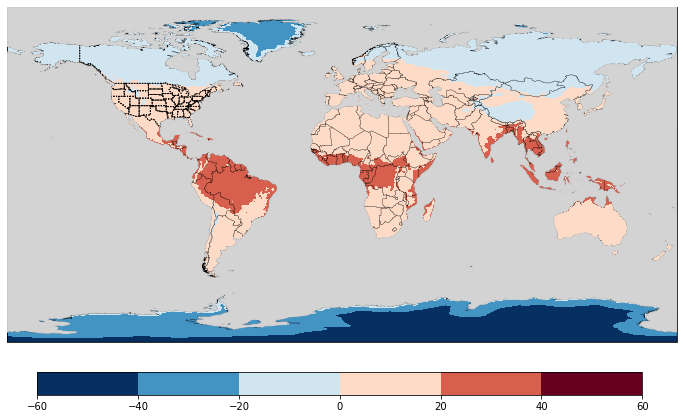

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8))
ax_coastlines_country(axs)
axs.add_feature(cfeature.STATES, linestyle=':')
im=twb_year_xr.min(dim='year').plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=cnlevel,
                ax=axs,
                transform=proj,
                #orientation='horizontal', 
                add_colorbar=False)

# zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
axs.add_feature(cfeature.OCEAN, zorder=10,color='lightgray')
axs.add_feature(cfeature.STATES, linestyle=':')

# zoom in
#axs.set_extent([-128, -68, 25.3, 48])

# The position of the bottom edge of the subplots, as a fraction of the figure height.
cbar_ax = fig.add_axes([0.16, 0.12, 0.7, 0.04])        
fig.colorbar(im, cax=cbar_ax,orientation='horizontal');

##### with ocean

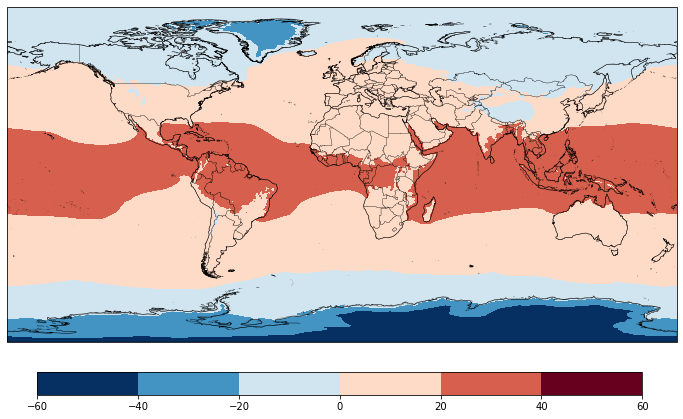

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8))
ax_coastlines_country(axs)
#axs.add_feature(cfeature.STATES, linestyle=':')
im=twb_year_xr.min(dim='year').plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=cnlevel,
                ax=axs,
                transform=proj,
                #orientation='horizontal', 
                add_colorbar=False)

# zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
#axs.add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

# zoom in
#axs.set_extent([-128, -68, 25.3, 48])

# The position of the bottom edge of the subplots, as a fraction of the figure height.
cbar_ax = fig.add_axes([0.16, 0.12, 0.7, 0.04])        
fig.colorbar(im, cax=cbar_ax,orientation='horizontal');

#### 3 Annual average number of hours > 30C, >32C, and >35C)

In [165]:
n_year = year_e - year_s + 1
ct_arr = np.zeros((n_year, 3, n_lat, n_lon))
for year in range(year_s, year_e + 1, 1):
    for month in range(1, n_month+1, 1):
        flnm = dir_i + 'TWB_' + str(year) + str(month).zfill(2) + '_head_hr.nc'
        #print(flnm)
        with  xr.open_dataset(flnm) as ds:
            n_3d = ds['__xarray_dataarray_variable__']
         
        ct_arr[year-year_s] = ct_arr[year-year_s] + n_3d


In [166]:
ct_arr_avg = np.mean(ct_arr, axis=0)
ct_arr_xr = xr.DataArray(ct_arr_avg, coords={'threshold': range(1,4,1),'latitude': twb.latitude, 'longitude':twb.longitude}, dims=["threshold","latitude", "longitude"])

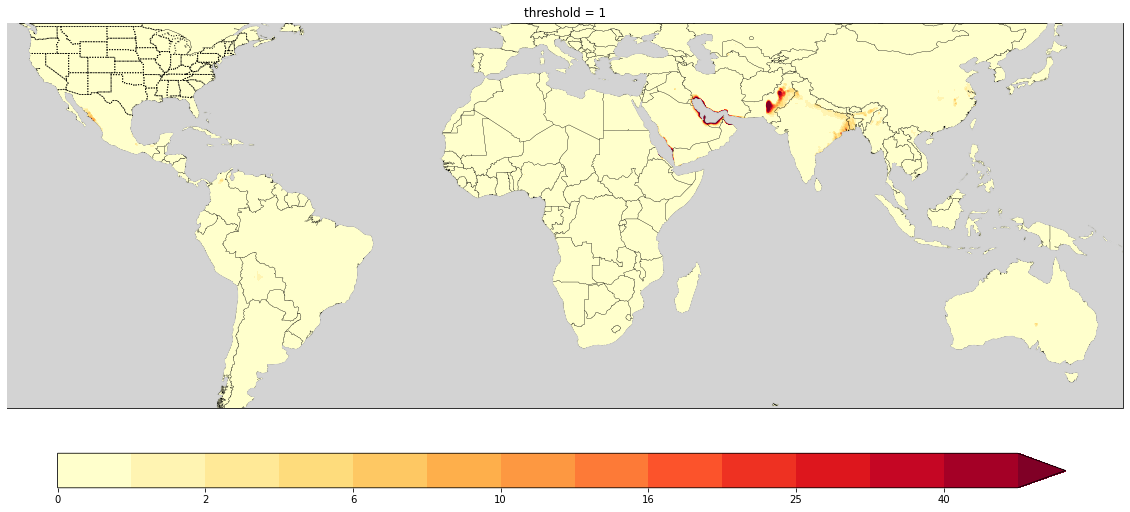

In [167]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20,15), subplot_kw={'projection': ccrs.PlateCarree()})

level_s = np.array([0, 1, 2, 4, 6, 8,10, 12,16, 20, 25, 30, 40,50])
ax_coastlines_country(axs) 
axs.add_feature(cfeature.STATES, linestyle=':')
# zoom in
axs.set_extent([-130, 160, -50., 50.], crs=ccrs.PlateCarree())
im=ct_arr_xr[0].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s,
                ax=axs,
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

# zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
axs.add_feature(cfeature.OCEAN, zorder=10,color='lightgray')


# The position of the bottom edge of the subplots, as a fraction of the figure height.
cbar_ax = fig.add_axes([0.16, 0.25, 0.7, 0.032])        
fig.colorbar(im, cax=cbar_ax,orientation='horizontal');

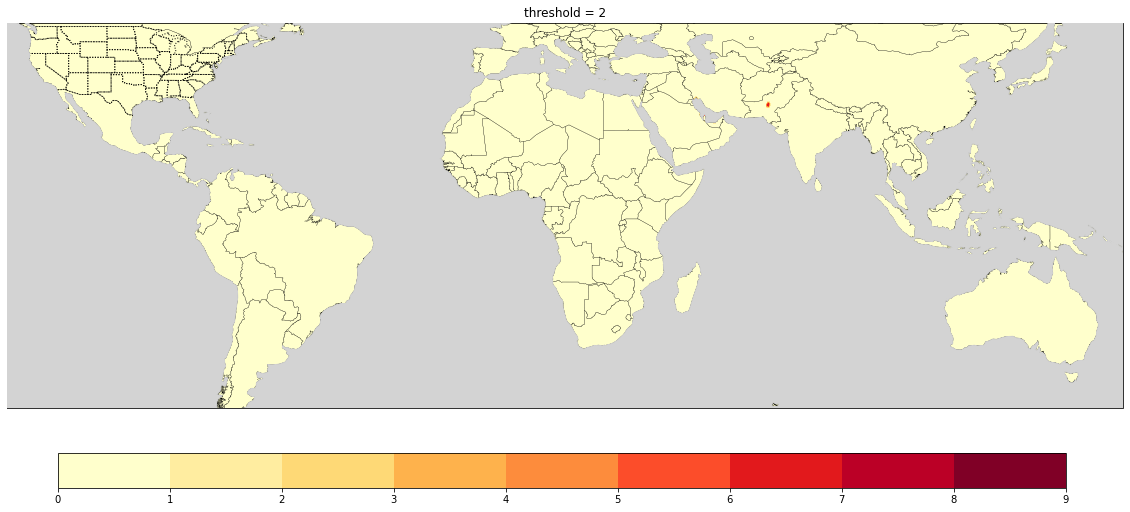

In [168]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20,15), subplot_kw={'projection': ccrs.PlateCarree()})

level_s = range(10)
ax_coastlines_country(axs)
axs.add_feature(cfeature.STATES, linestyle=':')
# zoom in
axs.set_extent([-130, 160, -50., 50.], crs=ccrs.PlateCarree())
im=ct_arr_xr[1].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s,
                ax=axs,
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

# zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
axs.add_feature(cfeature.OCEAN, zorder=10,color='lightgray')


# The position of the bottom edge of the subplots, as a fraction of the figure height.
cbar_ax = fig.add_axes([0.16, 0.25, 0.7, 0.032])        
fig.colorbar(im, cax=cbar_ax,orientation='horizontal');

<xarray.DataArray ()>
array(432.02380952)
Coordinates:
    threshold  int64 1
<xarray.DataArray ()>
array(7.5)
Coordinates:
    threshold  int64 2


/glade/scratch/mingge/ipykernel_170169/3260651174.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


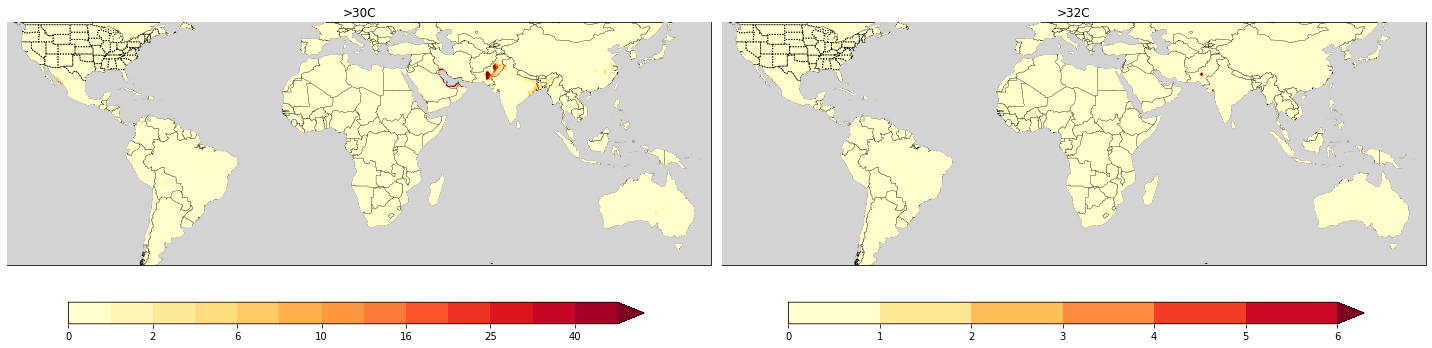

In [169]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
#level_s = [np.array([0, 2, 5, 10, 15, 20, 50, 100, 120, 150, 200]),range(7)]
level_s = [np.array([0, 1, 2, 4, 6, 8,10, 12,16, 20, 25, 30, 40,50]), range(7)]
title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([-130, 160, -50., 50.], crs=ccrs.PlateCarree())
        print(ct_arr_xr[col].max())
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.25, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.25, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()

##### zoom in

/glade/scratch/mingge/ipykernel_170169/352886012.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


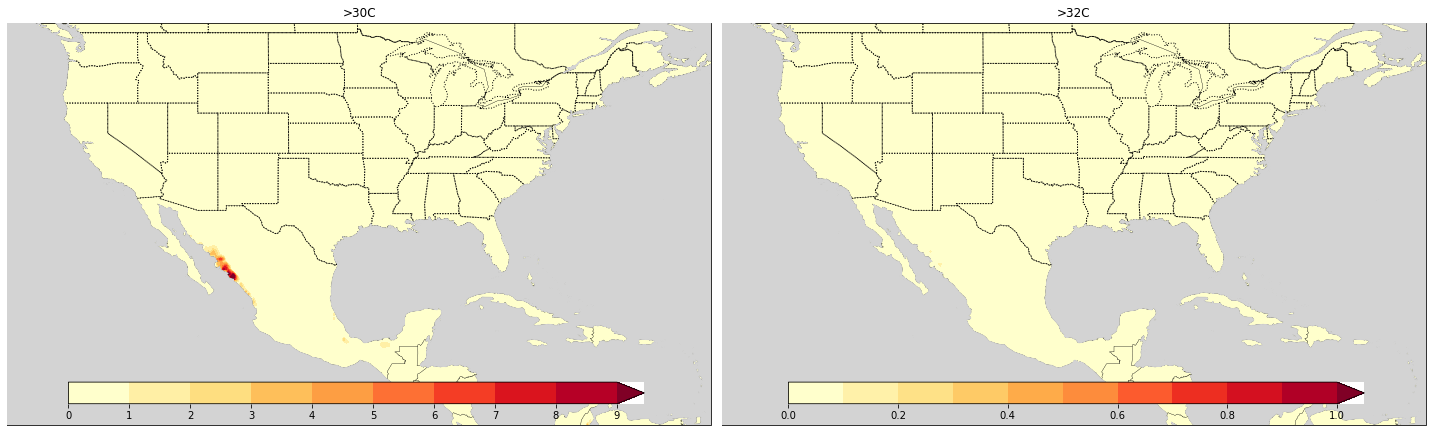

In [170]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
 
level_s = [range(10), np.linspace(0, 1, num=11),]

title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([-130, -60, 10., 50.], crs=ccrs.PlateCarree())
        
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.25, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.25, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()

/glade/scratch/mingge/ipykernel_170169/2347419142.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


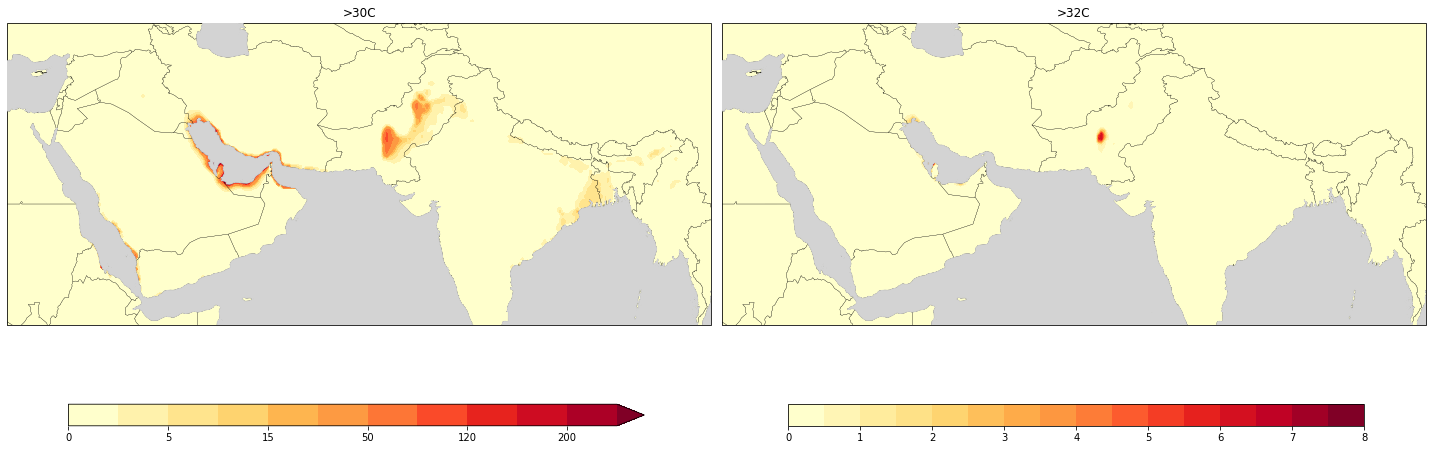

In [171]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
 
level_s = [np.array([0, 2, 5, 10, 15, 20, 50, 100, 120, 150, 200,400]), np.linspace(0, 8, num=17),]

title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([30, 100, 10., 40.], crs=ccrs.PlateCarree())
        
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.15, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.15, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()

#### - annual maximum number of hours > 30C, >32C 

In [172]:
ct_arr_max = np.max(ct_arr, axis=0)
ct_arr_xr = xr.DataArray(ct_arr_max, coords={'threshold': range(1,4,1),'latitude': twb.latitude, 'longitude':twb.longitude}, dims=["threshold","latitude", "longitude"])

<xarray.DataArray ()>
array(1140.)
Coordinates:
    threshold  int64 1
<xarray.DataArray ()>
array(105.)
Coordinates:
    threshold  int64 2


/glade/scratch/mingge/ipykernel_170169/2048209939.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


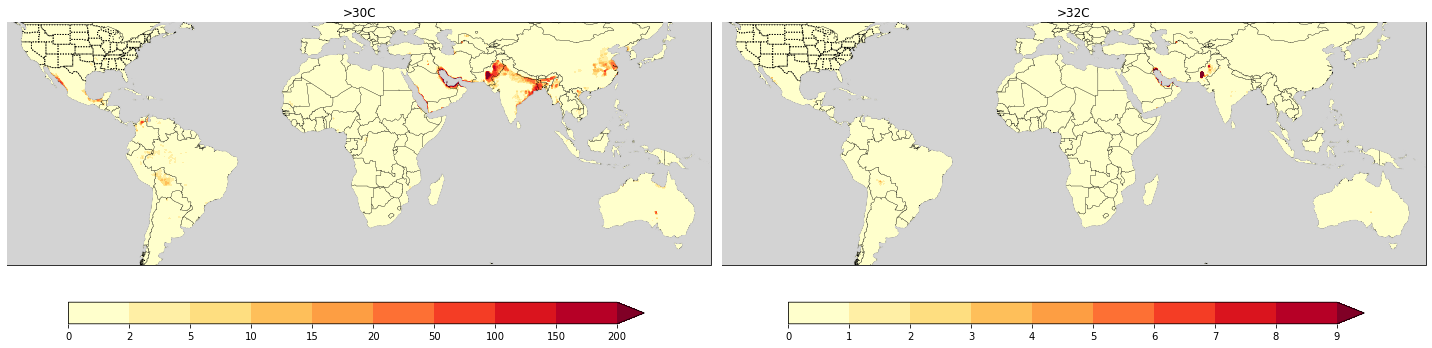

In [173]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
level_s = [np.array([0, 2, 5, 10, 15, 20, 50, 100, 150, 200]),range(10)]
title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([-130, 160, -50., 50.], crs=ccrs.PlateCarree())
        print(ct_arr_xr[col].max())
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.25, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.25, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()

/glade/scratch/mingge/ipykernel_170169/2025950239.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


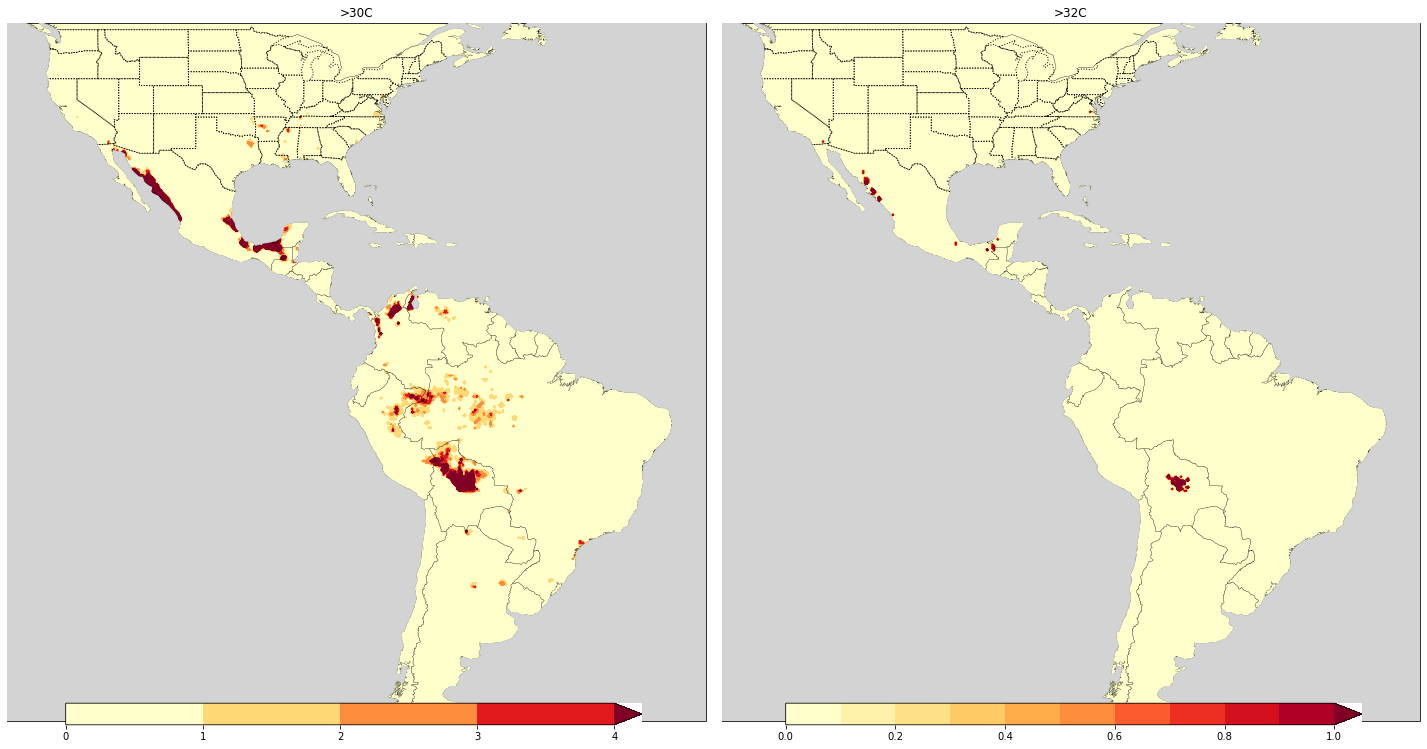

In [187]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
#level_s = [np.array([0, 2, 5, 10, 15, 20, 50, 100, 150, 200]),range(10)]
level_s = [range(5), np.linspace(0, 1, num=11)]
title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([-130, -30, -50., 50.], crs=ccrs.PlateCarree())
         
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.01, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.01, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()

/glade/scratch/mingge/ipykernel_170169/4095164451.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


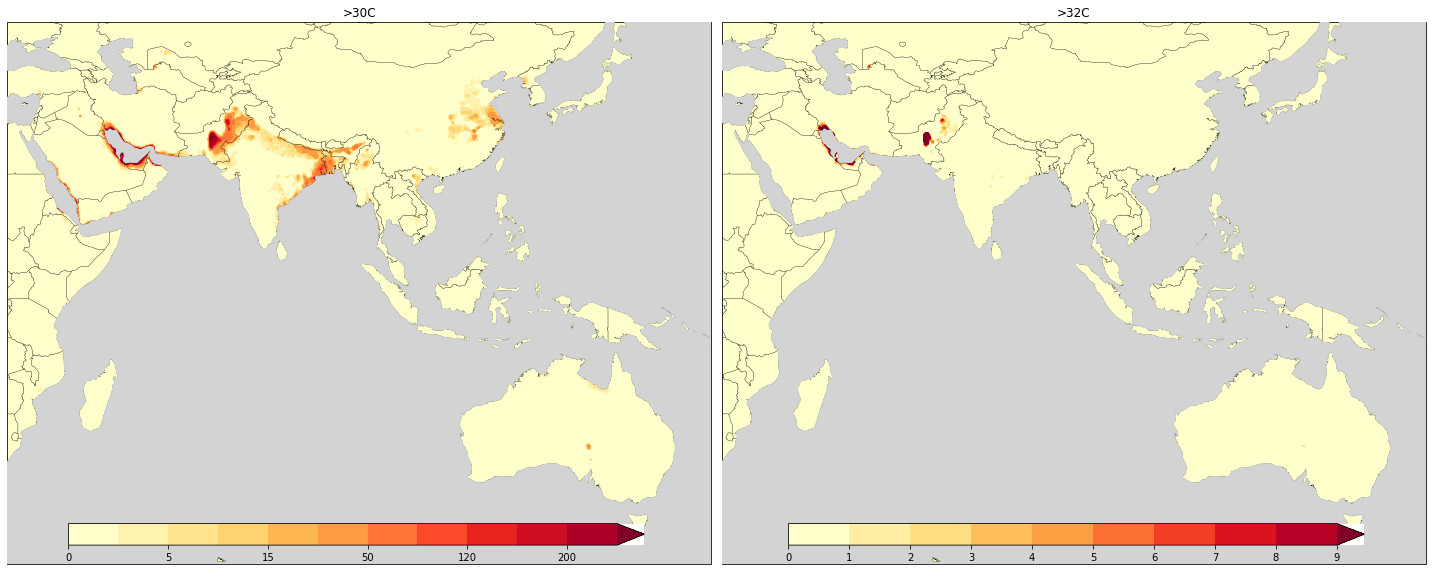

In [193]:
fig, axs = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,10))
 
level_s = [np.array([0, 2, 5, 10, 15, 20, 50, 100, 120, 150, 200,400]), range(10),]

title_s = ['>30C','>32C']
for col in range(2):
        ax_coastlines_country(axs[col])
        axs[col].add_feature(cfeature.STATES, linestyle=':')
        axs[col].set_extent([30, 160, -50., 50.], crs=ccrs.PlateCarree())
        
        im = ct_arr_xr[col].plot.contourf(
                # reset colorbar label using char_kwargs
                #cbar_kwargs={'label': ""},
                #levels=np.linspace(0, 24, num=11),
                levels=level_s[col],
                ax=axs[col],
                cmap='YlOrRd',
                transform=proj,
                add_colorbar=False)

        axs[col].set_title(title_s[col])
        
        # zorder: parameter to specify the drawing order. Lower zorders will be drawn first  
        axs[col].add_feature(cfeature.OCEAN, zorder=10,color='lightgray')

        # The position of the bottom edge of the subplots, as a fraction of the figure height.
        if col == 0 :
            cbar_ax = fig.add_axes([0.05, 0.15, 0.4, 0.03]) 
        else:
            cbar_ax = fig.add_axes([0.55, 0.15, 0.4, 0.03]) 
        fig.colorbar(im, cax=cbar_ax, orientation='horizontal');
plt.tight_layout()